In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Part 1
data = pd.read_csv('Instagram-Reach.csv')

# Convert to DateTime
data['Date'] = pd.to_datetime(data['Date'])

# Get Days of week and group by week
data['Day'] = data['Date'].dt.day_name()
dataDay = data.groupby('Day')['Instagram reach'].sum()
# Setting order of days correct
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dataDay = dataDay.reindex(ordered_days)
d30 = data[:30] # 30 days data

In [3]:
# Data Info
data.head() # Checks for first 5 columns
data.isnull().sum()
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             365 non-null    datetime64[ns]
 1   Instagram reach  365 non-null    int64         
 2   Day              365 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.7+ KB


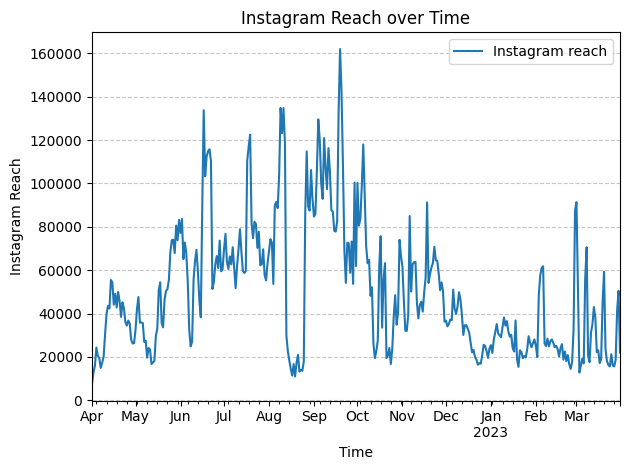

In [4]:
# Line Plot
data.plot(x='Date', y='Instagram reach', xlabel='Time', ylabel='Instagram Reach', title='Instagram Reach over Time')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


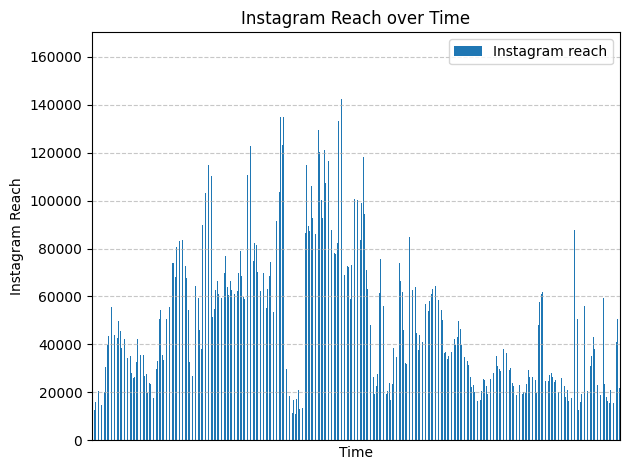

In [5]:
# Bar plot
box = data.plot.bar(x='Date', xlabel='Time', ylabel='Instagram Reach', title='Instagram Reach over Time', rot='vertical')
box.grid(axis='y', linestyle='--', alpha=0.7)
box.get_xaxis().set_ticks([])
plt.tight_layout()

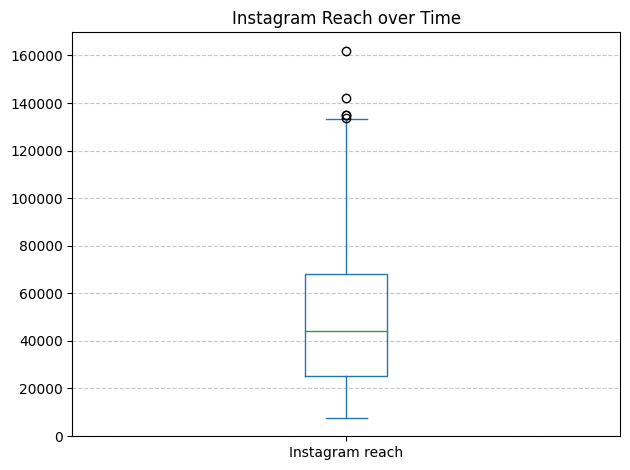

In [6]:
# Box Plot
data.plot.box(title='Instagram Reach over Time')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [7]:
# Mean for Weekly Grouped Data
print("Mean: ")
print(data.groupby('Day').mean())
print("\nMedian: ")
print(data.groupby('Day').median())
print("\nStandard Deviation: ")
print(data.groupby('Day').std())


Mean: 
                         Date  Instagram reach
Day                                           
Friday    2022-09-30 00:00:00     46666.849057
Monday    2022-09-29 12:00:00     52621.692308
Saturday  2022-09-27 12:00:00     47374.750000
Sunday    2022-09-28 12:00:00     53114.173077
Thursday  2022-10-02 12:00:00     48570.923077
Tuesday   2022-09-30 12:00:00     54030.557692
Wednesday 2022-10-01 12:00:00     51017.269231

Median: 
                         Date  Instagram reach
Day                                           
Friday    2022-09-30 00:00:00          35574.0
Monday    2022-09-29 12:00:00          46853.0
Saturday  2022-09-27 12:00:00          40012.0
Sunday    2022-09-28 12:00:00          47797.0
Thursday  2022-10-02 12:00:00          39150.0
Tuesday   2022-09-30 12:00:00          48786.0
Wednesday 2022-10-01 12:00:00          42320.5

Standard Deviation: 
                                 Date  Instagram reach
Day                                                   
Frida

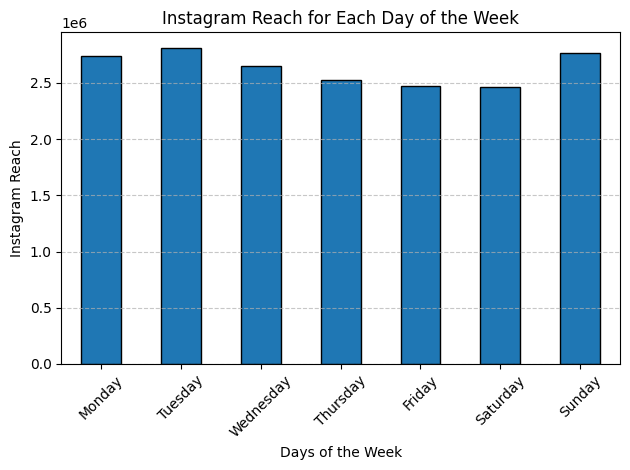

In [8]:
# Bar Plot per Week Day
dataDay.plot.bar(xlabel='Days of the Week', ylabel='Instagram Reach', title='Instagram Reach for Each Day of the Week', edgecolor='Black', rot=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

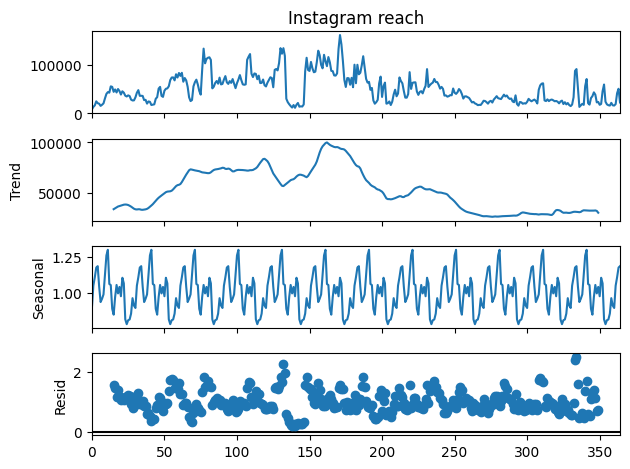

In [9]:
# Trend and Seasonal Analysis
# Period = 30 shows the monthly change
analysis = seasonal_decompose(data['Instagram reach'], model="multiplicative", period=30)
plot = analysis.plot()

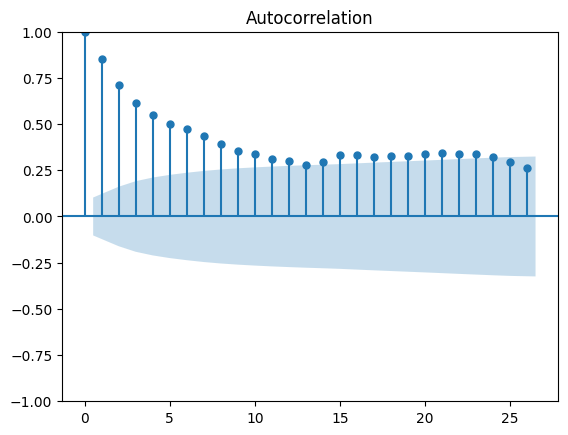

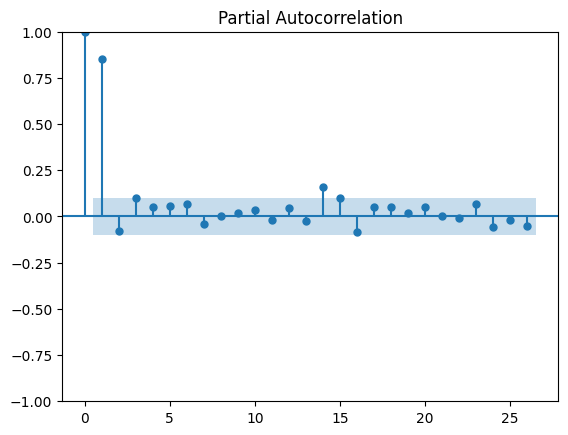

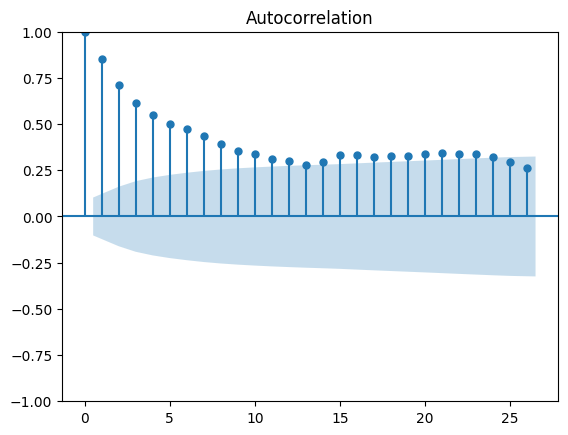

In [10]:
# Plots for p and q
plot_pacf(data['Instagram reach'])
plot_acf(data['Instagram reach'])

In [11]:
p = 10  # Significant terms in ACF
d = 1
q = 2   # Significant terms in PACF

In [12]:
# Training the Model
model = SARIMAX(data['Instagram reach'], order=(p, d, q), seasonal_order=(p, d, q, 12)) 
results = model.fit()

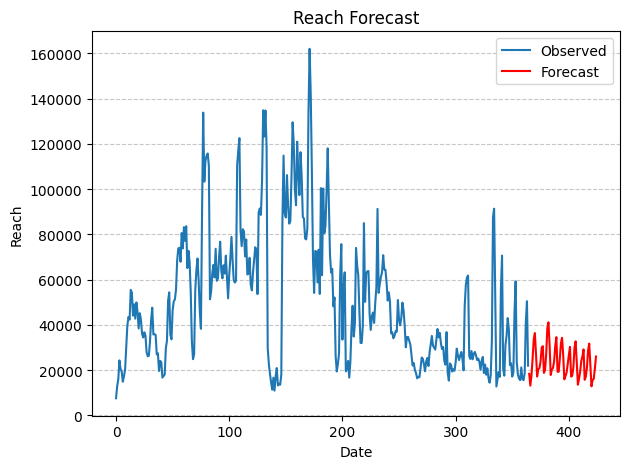

In [13]:
# Forecast future values
forecast_periods = 60 # Forecast the next 60 days
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean

# Plot the forecast
plt.plot(data['Instagram reach'], label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Reach Forecast")
plt.xlabel("Date")
plt.ylabel("Reach")
plt.legend()
plt.tight_layout()
plt.show()

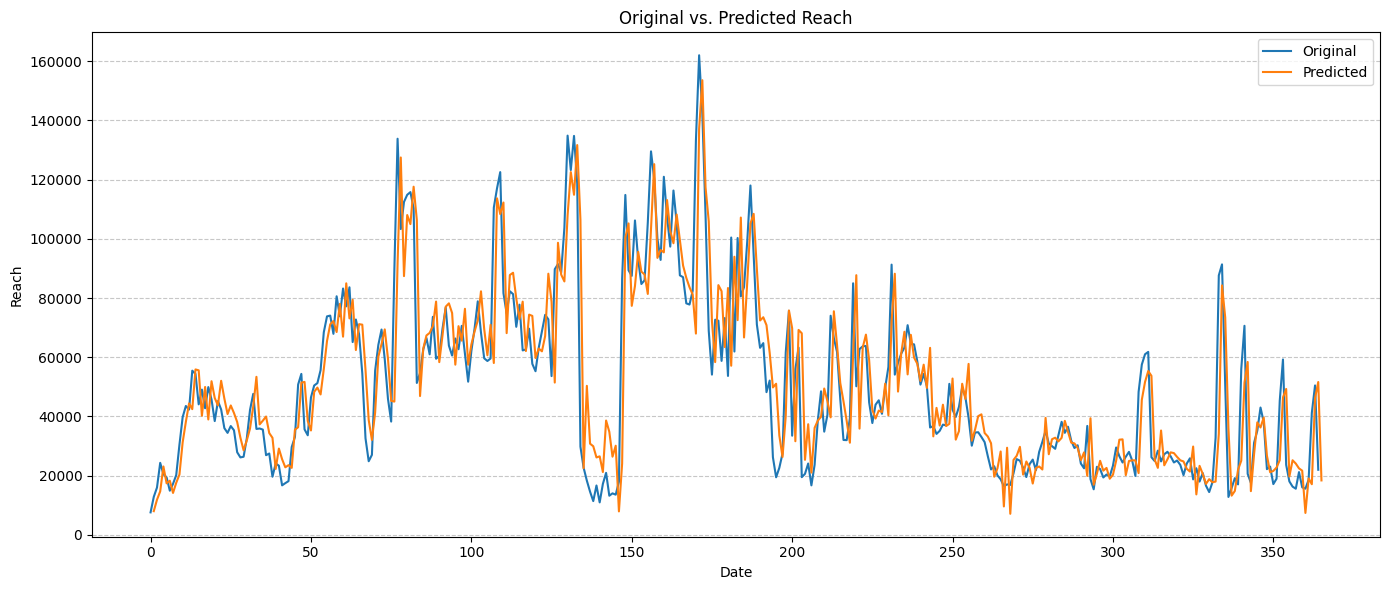

In [16]:
# Comparison of Original vs Predicted Data

pred_data = results.predict(1, len(data))
fig = plt.figure(figsize=(14,6))
plt.plot(data['Instagram reach'], label='Original')
plt.plot(pred_data, label='Predicted')
plt.title('Original vs. Predicted Reach')
plt.xlabel('Date')
plt.ylabel('Reach')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()